# NLP Practical 7: Demonstration of Singular Value Decomposition (SVD) for dimensionality reduction in text/audio/image data.

Task
- Consider a dataset which can be represented in form of a matrix.
- Apply SVD on for data compression.
- Use lower rank approximation with different value of k to observe the effect of data compression to the quality and result.


# Devasy Patel
## 20BCE057

In [ ]:
# we are supposed to implement and use svd for any application we want
# we need not use the svd from scratch we may use the svd from numpy


# image compression using svd


# Image compression

In [37]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

# load the image
img = Image.open('image.jpeg')
img = np.array(img)
print(img.shape)


(1024, 1024, 3)


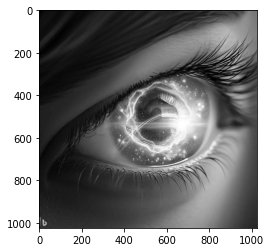

In [38]:
# after converting image to matrix we need to convert it to grayscale

img = np.mean(img, axis=2)
plt.imshow(img, cmap='gray')

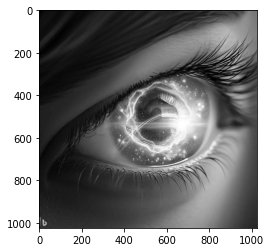

In [39]:
# now we need to convert the image to matrix


# A = U S V^T

# calculate svd
U, S, V = np.linalg.svd(img, full_matrices=False)
 
# reconstruct the image
img_recon = np.dot(U, np.dot(np.diag(S), V))
plt.imshow(img_recon, cmap='gray')

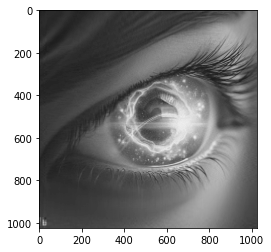

In [40]:
# now reconstruct the image with different number of singular values
def reconnumsvd(numsvd, img):
    U, S, V = np.linalg.svd(img, full_matrices=False)
    S[numsvd:] = 0
    U = U[:, :numsvd]
    V = V[:numsvd, :]
    S = np.diag(S[:numsvd])
    # print(U.shape, S.shape, V.shape)
    img_recon = np.dot(U, np.dot(S, V))
    return img_recon

img_reconn = reconnumsvd(100, img)
plt.imshow(img_reconn, cmap='gray')

# now plot 10 images with different number of singular values


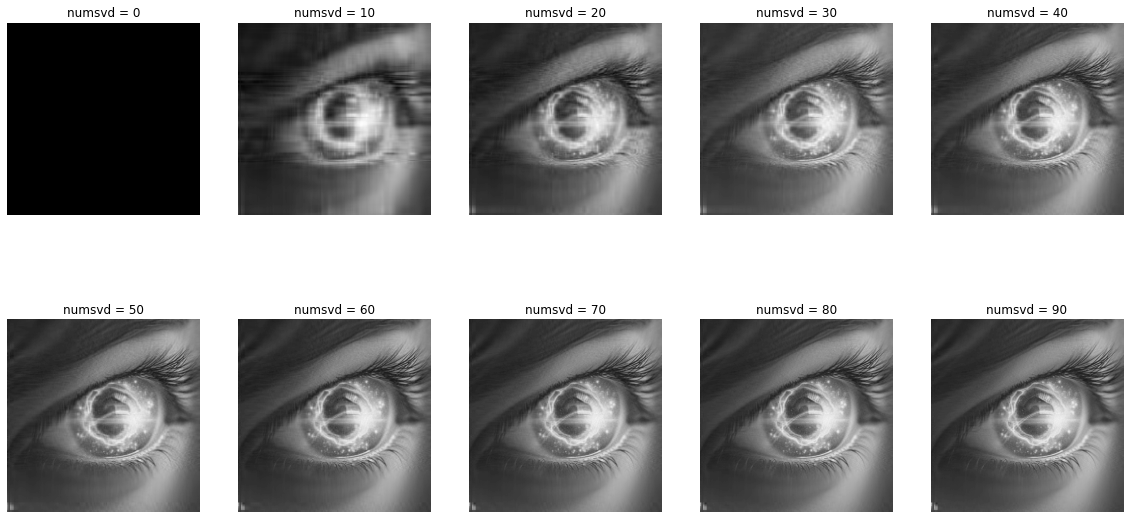

In [41]:
# now plot 10 images with different number of singular values

# plot them in a 2x5 grid
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(reconnumsvd(i*10, img), cmap='gray')
    plt.title('numsvd = {}'.format(i*10))
    plt.axis('off')
    
 
     

# will Now do it for colored image

In [42]:
# now will do for color image by seperating the channels

# load the image
img = Image.open('image.jpeg')
img = np.array(img)
print(img.shape)
imgr = img[:,:,0]
imgg = img[:,:,1]
imgb = img[:,:,2]


(1024, 1024, 3)


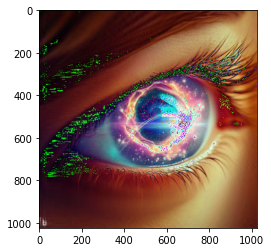

In [43]:
# now we need to convert the image to matrix
recon_color = reconnumsvd(100, imgr)
# concat the channels
img_recon = np.dstack((recon_color, reconnumsvd(100, imgg), reconnumsvd(100, imgb)))

# plot the image
plt.imshow(img_recon.astype('uint8'))
plt.imsave('image_recon.jpeg', img_recon.astype('uint8'))

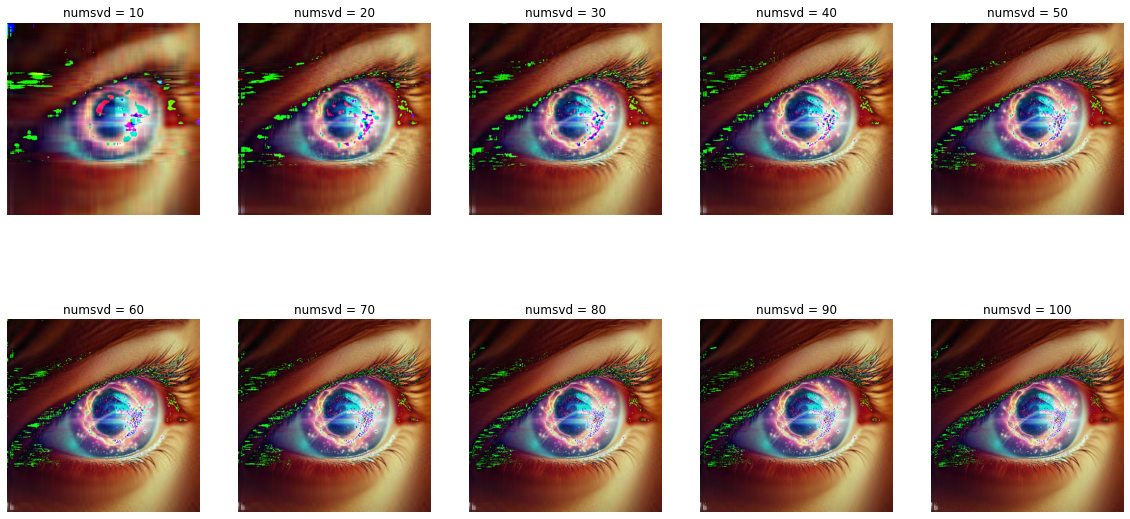

In [44]:
plt.figure(figsize=(20, 10))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    recon_color = reconnumsvd(i*10, imgr)
    img_recon = np.dstack((recon_color, reconnumsvd(i*10, imgg), reconnumsvd(i*10, imgb)))

    plt.imshow(img_recon.astype('uint8'))
    plt.title('numsvd = {}'.format(i*10))
    plt.axis('off')

# Let's see how it changes with higher number of features

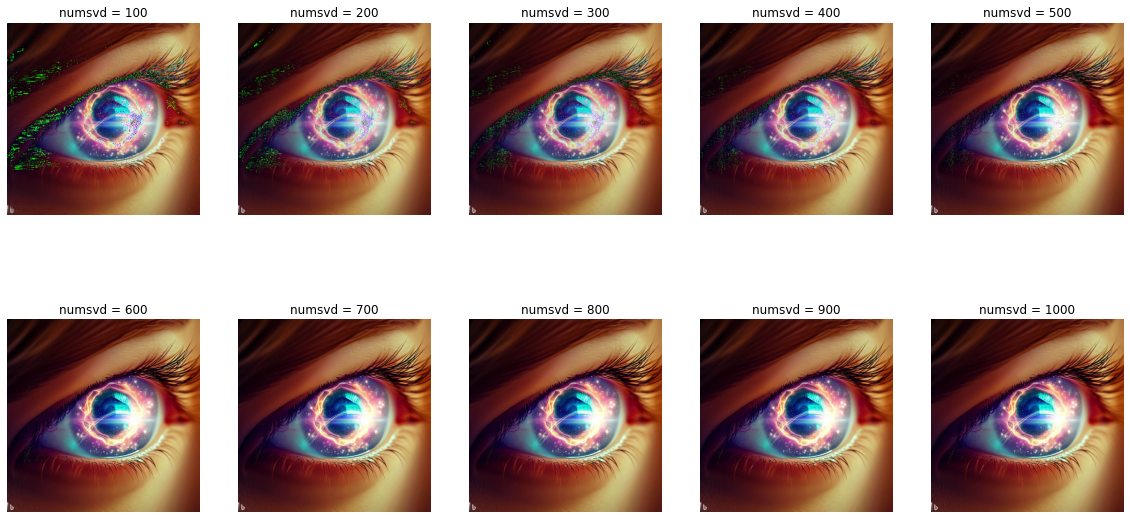

In [45]:
plt.figure(figsize=(20, 10))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    recon_color = reconnumsvd(i*100, imgr)
    img_recon = np.dstack((recon_color, reconnumsvd(i*100, imgg), reconnumsvd(i*100, imgb)))

    plt.imshow(img_recon.astype('uint8'))
    plt.title('numsvd = {}'.format(i*100))
    plt.axis('off')